# Reading Data

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
train = pd.read_csv(r'C:\Users\itzme\Downloads\train_ctrUa4K.csv')

In [177]:
test = pd.read_csv(r'C:\Users\itzme\Downloads\test_lAUu6dG.csv')

In [178]:
train_original=train.copy() 
test_original=test.copy()

# Understanding the Data

In [179]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [180]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [181]:
 train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [182]:
train.shape, test.shape

((614, 13), (367, 12))

In [183]:
##Target Variable

In [184]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [185]:
# Normalize can be set to True to print proportions instead of number

In [186]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

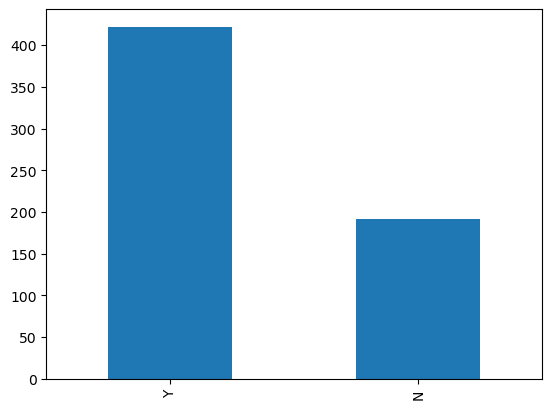

In [187]:
train['Loan_Status'].value_counts().plot.bar()

In [188]:
##Independent Variable (Categorical)

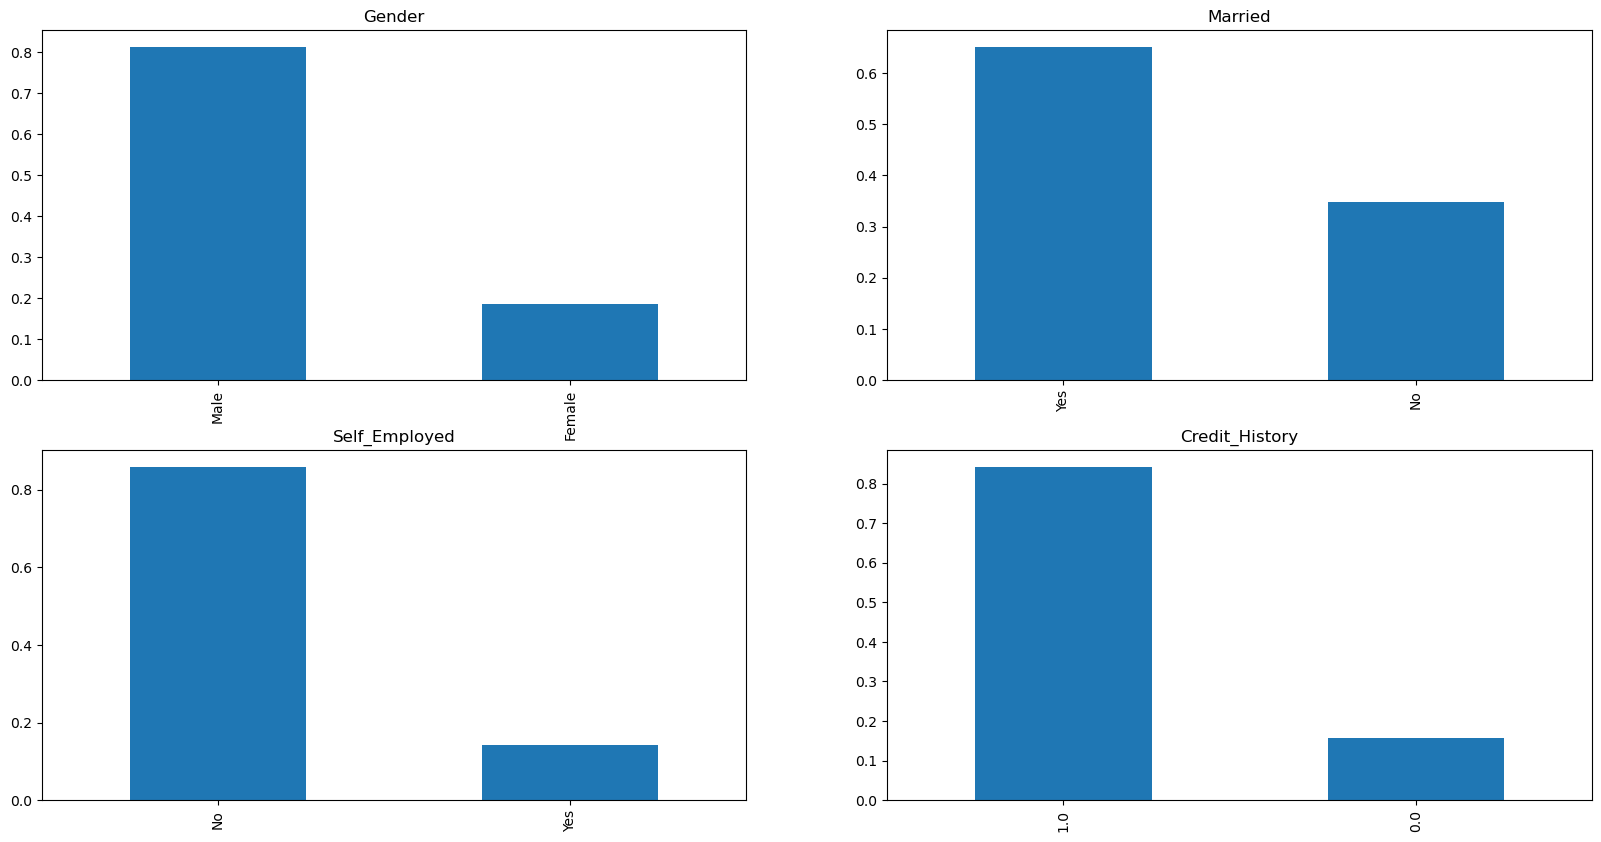

In [189]:
plt.figure(1),plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [190]:
##Independent Variable (Ordinal)

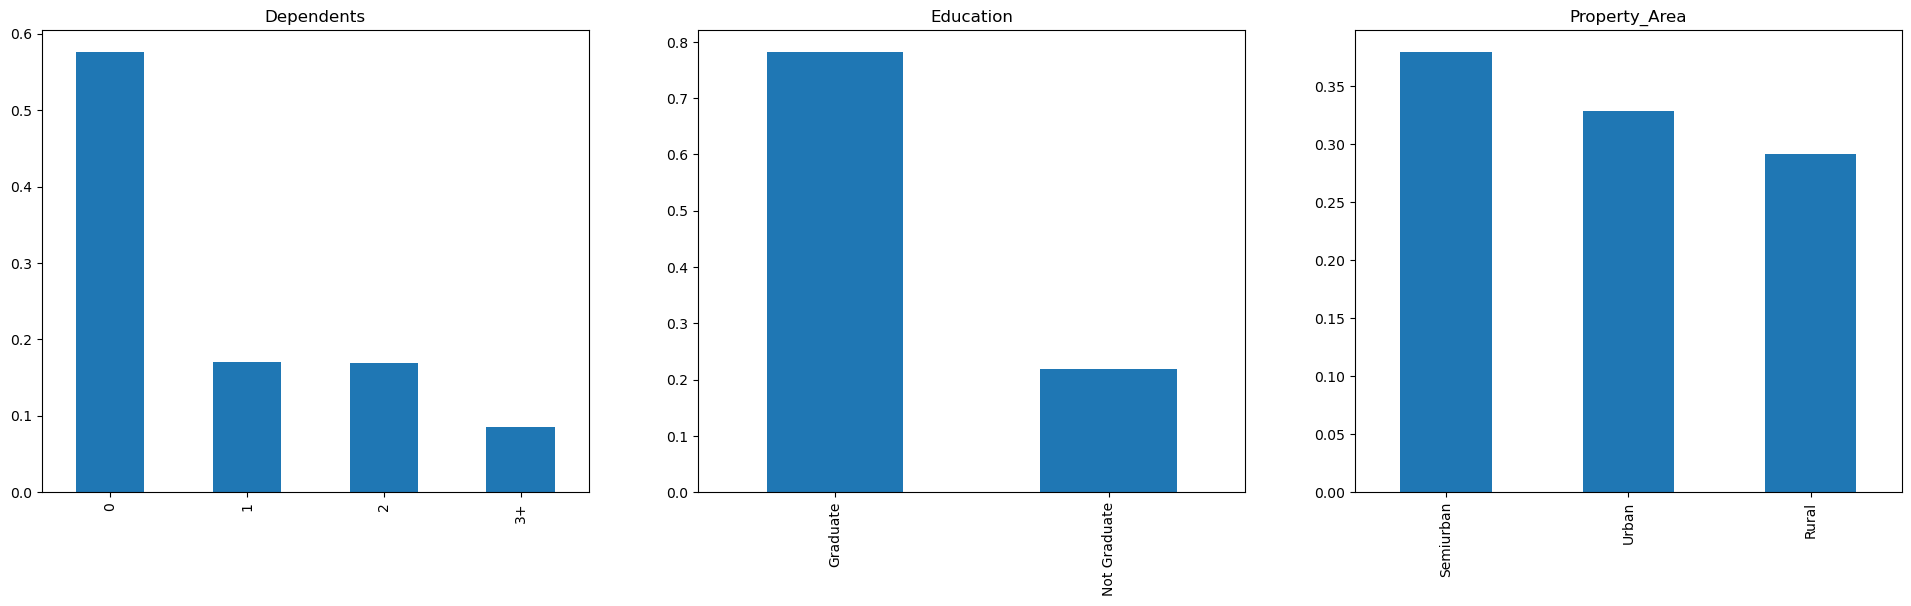

In [191]:
plt.figure(1),plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [192]:
##Independent Variable (Numerical)

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\925064631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);


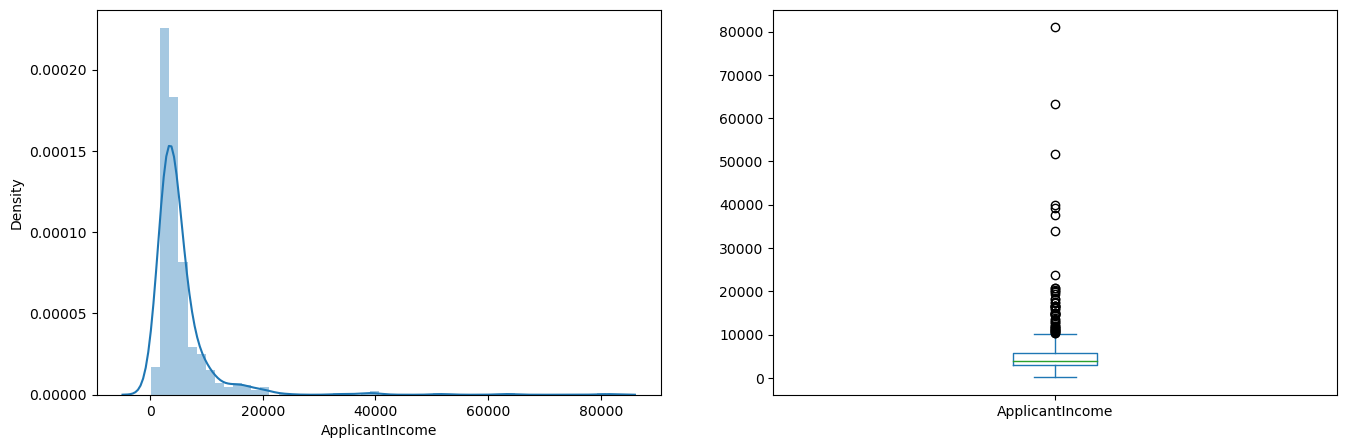

In [193]:
plt.figure(1),plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [194]:
##Let’s look at the distribution of the LoanAmount variable.

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\2097680187.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  df=train.dropna(),sns.distplot(train['LoanAmount']);


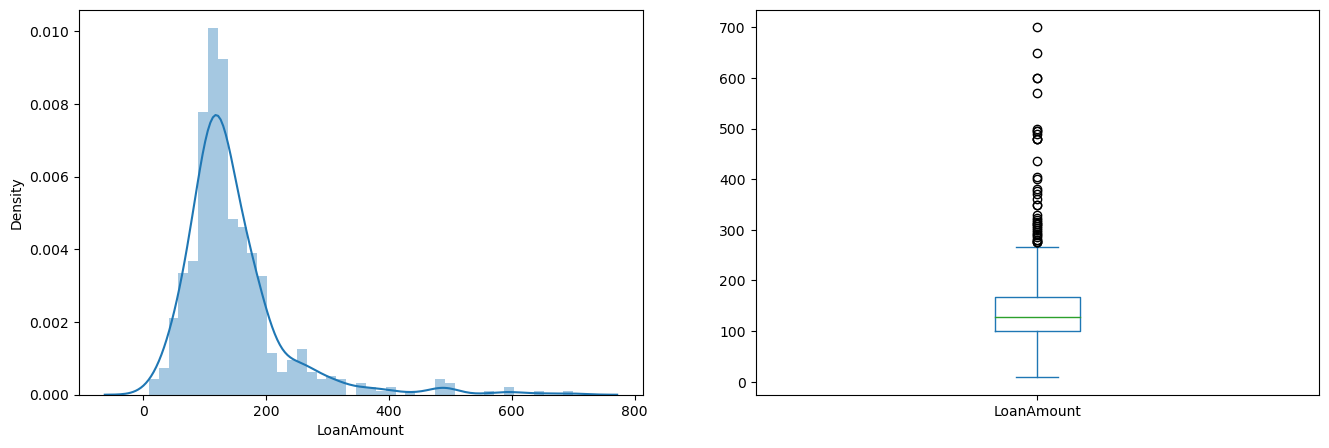

In [195]:
plt.figure(1),plt.subplot(121)
df=train.dropna(),sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [196]:
##Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

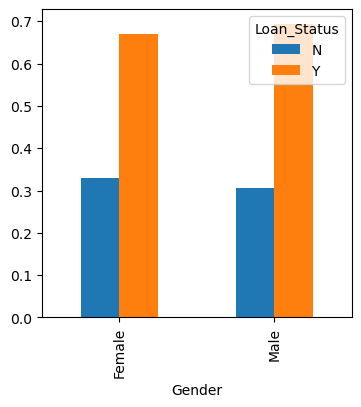

In [197]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

In [198]:
##Visualizing the remaining categorical variables vs the target variables

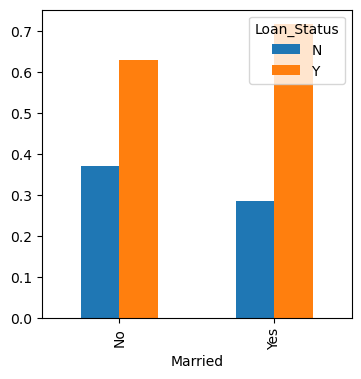

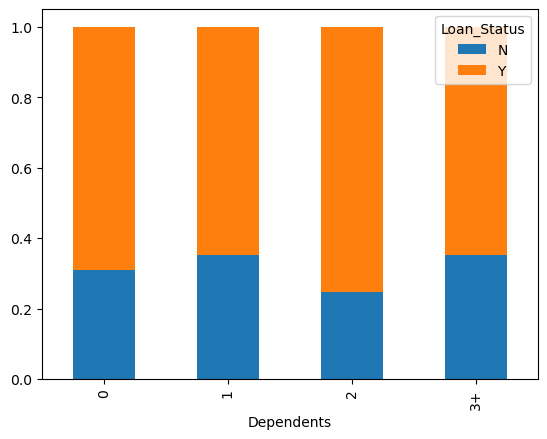

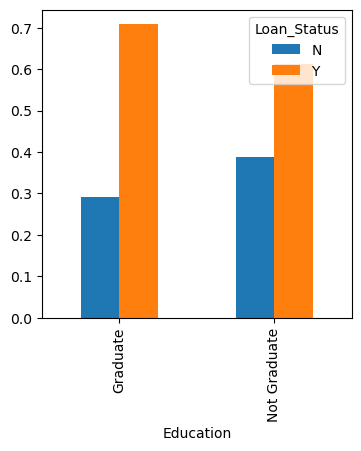

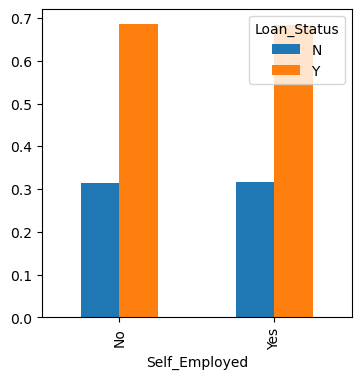

In [199]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

In [200]:
##relationship between the remaining categorical independent variables and Loan_Status

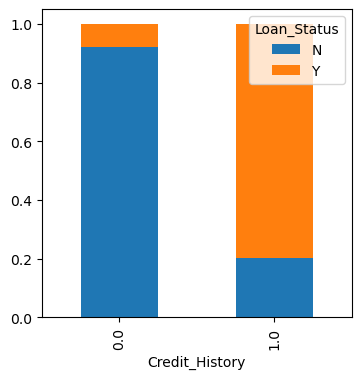

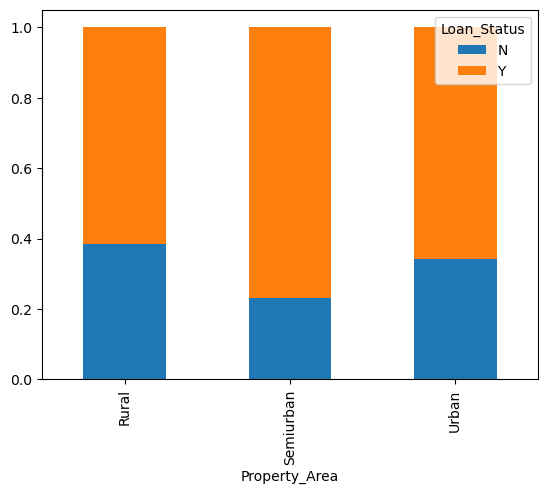

In [201]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

In [202]:
##Numerical Independent Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

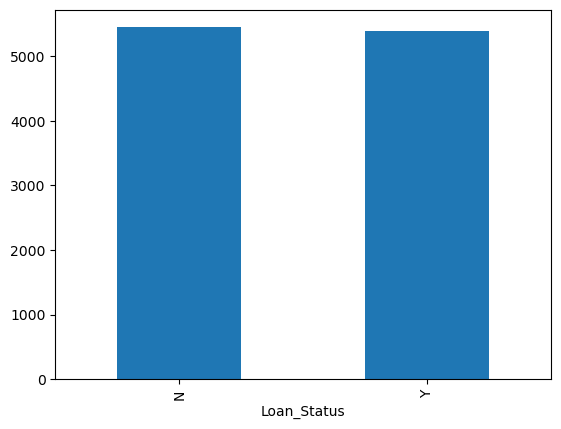

In [203]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# Missing Value and Outlier Treatment

In [204]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [205]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [206]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [207]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [208]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [209]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [210]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [211]:
##Outlier Treatment

In [212]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


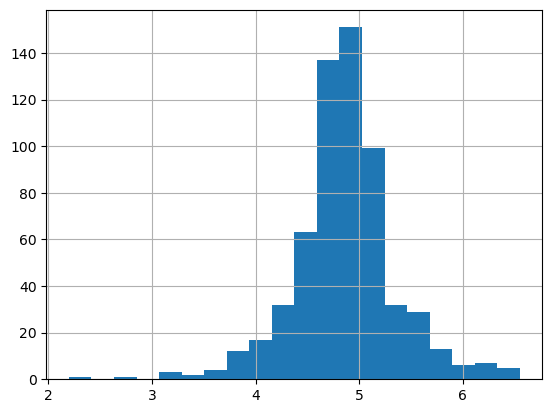

In [213]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Modelling- Part A

# Logistic Regression

In [215]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [216]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\1312836301.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('Loan_Status',1)


In [219]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [ ]:
##We will use the train_test_split function from sklearn to divide our train dataset. So first, let us import train_test_split.]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

In [217]:
pred_cv = model.predict(x_cv)

In [218]:
accuracy_score(y_cv,pred_cv)

0.9351351351351351

So our predictions are almost 90% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [ ]:
pred_test = model.predict(test)

In [ ]:
submission = pd.read_csv(r'C:\Users\itzme\Downloads\sample_submission_49d68Cx.csv')

In [ ]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From this submission, we got an accuracy of 0.7847 on the leaderboard.

# Logistic Regression Using Stratified k-folds Cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [220]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n1 of kfold 5
accuracy_score 0.8048780487804879
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


C:\Users\itzme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\itzme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

# Feature Engineering

In [221]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\2845973276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income']);


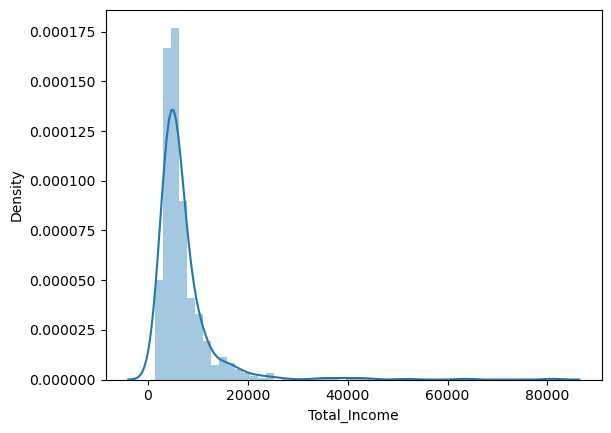

In [222]:
sns.distplot(train['Total_Income']);

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\2645053949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income_log']);


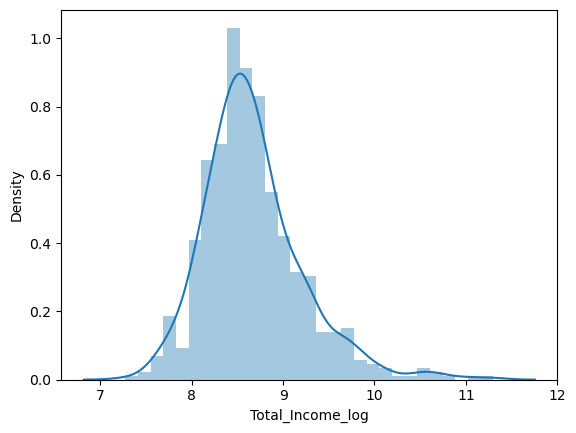

In [223]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [224]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\4215624078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['EMI']);


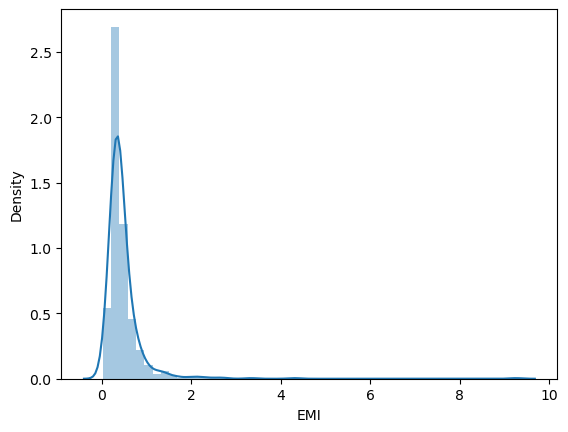

In [225]:
sns.distplot(train['EMI']);

C:\Users\itzme\AppData\Local\Temp\ipykernel_6820\4221231834.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Balance Income']);


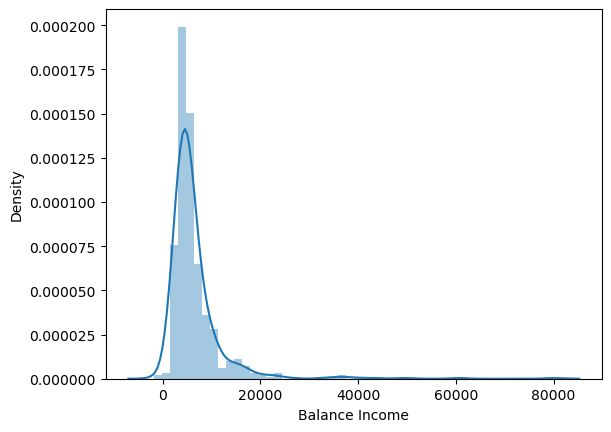

In [226]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [228]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)

KeyError: "['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] not found in axis"

# Modelling - Part B

Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test) 

The mean validation accuracy for this model is 0.69

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

We got an accuracy of 0.69 which is much lesser than the accuracy of the Decision tree model

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test)

The mean validation accuracy for this model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyperparameters. Grid-search is a way to select the best of a family of hyperparameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in the random forest model.

# Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None,min_samples_leaf=1, min_samples_split=2, 
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),
fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 

pred_test = model.predict(test) 
pred2 =  model.predict_proba(test[:,1]

We got an accuracy of 0.7638 from the random forest model on the leaderboard.

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

# Conclusion

We have done 4 Models for prediction such as Logistic Regression, Logistic Regression using tratified k-folds Cross-validation,
Decision Tree and Random Forest.
Accuracy:
Logistic Regression=0.935
Logistic Regression using tratified k-folds Cross-validation=0.81
Decision Tree= 0.69
Random Forest=0.7638

So we are choosing the Logistic Regression as the best model for prediction.